In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import csv
import numpy as np

In [2]:
df2=pd.read_csv('final_input_file.csv')
#df2

# Visualizing The Dataset

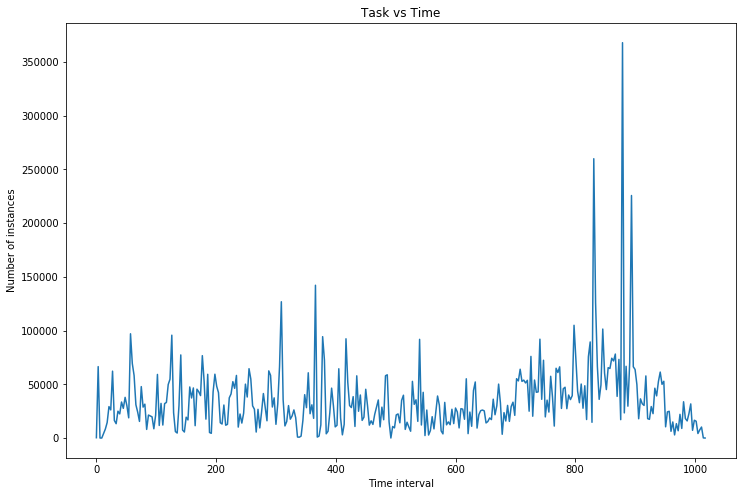

In [3]:
fig=plt.figure(figsize=(12,8))
plt.title("Task vs Time")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(df2.time_interval, df2.no_of_instances)
plt.show()

# Stationarity Check

In [6]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
#Perform Dickey-Fuller test to test data stationarity
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller test')
dftest=adfuller(df2.no_of_instances, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
print(dfoutput)

Results of Dickey-Fuller test
Test Statistic                  -4.600803
p-value                          0.000129
#Lags Used                       4.000000
Number of Observations Used    335.000000
Critical Value (1%)             -3.450022
Critical Value (5%)             -2.870207
Critical Value (10%)            -2.571387
dtype: float64


In Dickey-Fuller test the critical value should be more than the test statistics. p-value should be very small. Our result satisfies it. So our data is Stationary

# ARIMA Model

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `ar

                             ARIMA Model Results                              
Dep. Variable:      D.no_of_instances   No. Observations:                  339
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4051.026
Method:                       css-mle   S.D. of innovations          37441.832
Date:                Tue, 04 Dec 2018   AIC                           8108.052
Time:                        17:08:35   BIC                           8119.530
Sample:                             1   HQIC                          8112.626
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8820   1347.008     -0.001      0.999   -2640.970    2639.206
ar.L1.D.no_of_instances    -0.5112      0.047    -10.941      0.000      -0.603      -0.420


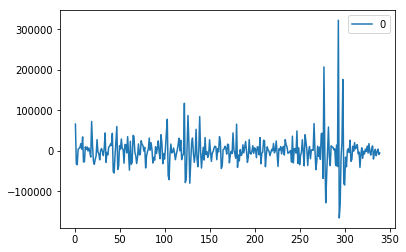

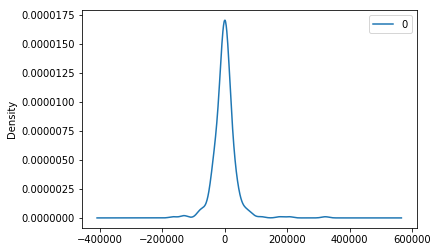

                   0
count     339.000000
mean        0.184165
std     37542.271050
min   -165140.409954
25%    -13256.379283
50%      -830.619428
75%     11456.339078
max    322078.908994


In [4]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
# fit model
model = ARIMA(df2.no_of_instances, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Without Sliding Window ARIMA

Size= 221
221
119
Time, predicted, expected 
 663 17751 36142.0
Time, predicted, expected 
 666 28558 21670.0
Time, predicted, expected 
 669 27549 30017.0
Time, predicted, expected 
 672 26888 50175.0
Time, predicted, expected 
 675 42501 32833.0
Time, predicted, expected 
 678 39922 3486.0
Time, predicted, expected 
 681 15066 23640.0
Time, predicted, expected 
 684 15675 15839.0
Time, predicted, expected 
 687 19016 30368.0
Time, predicted, expected 
 690 24489 15484.0
Time, predicted, expected 
 693 21475 29322.0
Time, predicted, expected 
 696 23926 33343.0
Time, predicted, expected 
 699 31948 21100.0
Time, predicted, expected 
 702 26079 55211.0
Time, predicted, expected 
 705 41804 53157.0
Time, predicted, expected 
 708 54197 64017.0
Time, predicted, expected 
 711 60022 52712.0
Time, predicted, expected 
 714 57507 53887.0
Time, predicted, expected 
 717 53735 51242.0
Time, predicted, expected 
 720 52478 53711.0
Time, predicted, expected 
 723 53042 24971.0
Time, predicted, 

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 744 71860 36017.0
Time, predicted, expected 
 747 59859 72362.0
Time, predicted, expected 
 750 57084 19660.0
Time, predicted, expected 
 753 42547 35256.0
Time, predicted, expected 
 756 28555 24156.0
Time, predicted, expected 
 759 29072 57451.0
Time, predicted, expected 
 762 43107 38270.0
Time, predicted, expected 
 765 46768 11117.0
Time, predicted, expected 
 768 22848 64903.0
Time, predicted, expected 
 771 41670 60965.0
Time, predicted, expected 
 774 62997 66251.0
Time, predicted, expected 
 777 64239 27533.0
Time, predicted, expected 
 780 44380 45872.0
Time, predicted, expected 
 783 38088 47244.0
Time, predicted, expected 
 786 46857 27305.0
Time, predicted, expected 
 789 36044 40015.0
Time, predicted, expected 
 792 34490 35776.0
Time, predicted, expected 
 795 37796 39418.0
Time, predicted, expected 
 798 38058 104912.0
Time, predicted, expected 
 801 77008 73958.0
Time, predicted, expected 
 804 87693 43559.0
Time, predicted, expected 
 807 5

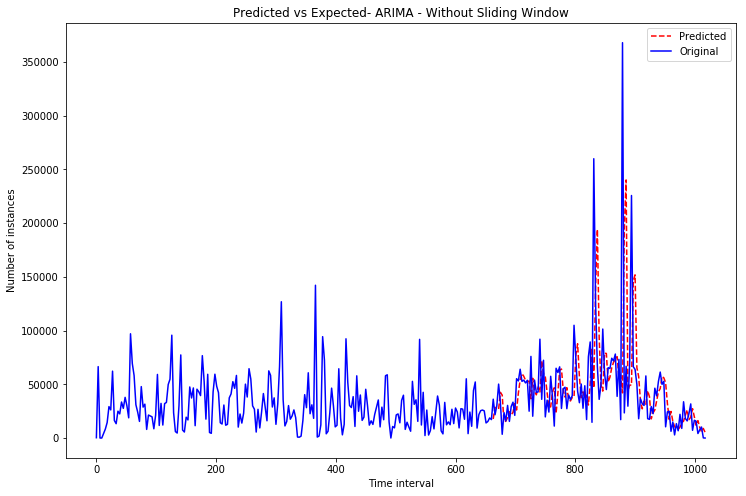

In [5]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
import numpy
import math
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

#Computational Time
import time
time_start = time.clock()
 
X = df2.no_of_instances
X = X.astype('float32')
size = int(len(X) * 0.65)
print('Size=',size)
train, test = X[0:size], X[size:len(X)]
print(len(train))
print(len(test))
history = [x for x in train]
#print('History \n', history)
#print('Train \n', train)
#print('Test \n', test)
predictions = list()
#for t in range(len(test)):
times=[]
SE=0
sumAPE=0
sumMASE=0
for t in range (len(train),len(train)+len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #print('OUTPUT= \n', output)
    yhat = int(output[0])
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('XYZ')
    times.append(df2.time_interval[t])
    print('Time, predicted, expected \n',df2.time_interval[t], yhat, obs)
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=(abs(yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(test[t]-df2.no_of_instances[t-1]))
    #sumMASE=sumMASE+ASE
RMSE=math.sqrt(SE/len(test))
MAPE=(sumAPE/(len(test)))*100
#MASE=(sumMASE/(len(test)))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)

#print('Time= \n', times)

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)

# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- ARIMA - Without Sliding Window")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(times, predictions, color='red', label='Predicted', linestyle='dashed')
plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original', linestyle='solid')
plt.legend()
plt.show()
